In [ ]:
!pip install numpy
!pip install scipy
!pip install matplotlib

In [2]:
import numpy as np
import cv2

import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.signal as sg

from PIL import Image
import requests

# Loading an Image

In [8]:
#load image from the internet
url = 'https://th.bing.com/th/id/OIP.oyBRvHQ9Gde4ypLh9b5VsgHaEK?rs=1&pid=ImgDetMain'
resp = requests.get(url, stream=True).raw
image = Image.open(resp)
image = np.array(image)

In [6]:
# Load an image from file
image_path = 'duck.jpg'  # Replace with the path to your image file
image = cv2.imread(image_path)

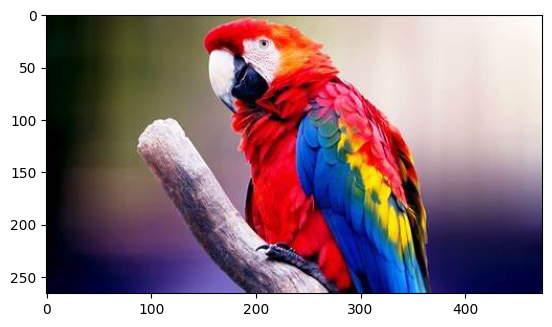

In [9]:
plt.imshow(image);

In [10]:
np.shape(image)

(266, 474, 3)

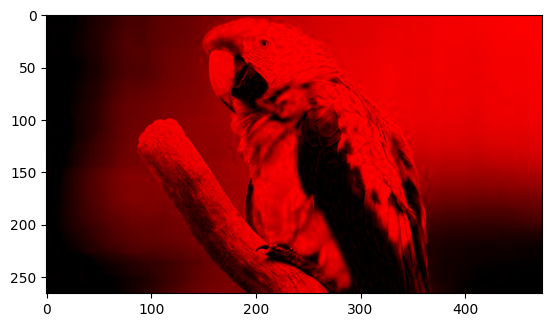

In [11]:
img_red = image.copy()
img_red[:,:,1:] = 0
# img_red
plt.imshow(img_red);

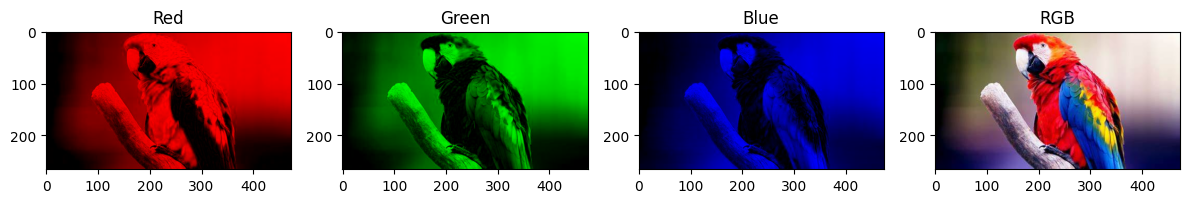

In [12]:
img_green = image.copy()
img_green[:,:,0] = 0
img_green[:,:,2] = 0

img_blue = image.copy()
img_blue[:,:,:2] = 0

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Red")
plt.imshow(img_red);

plt.subplot(1, 4, 2)
plt.title("Green")
plt.imshow(img_green);

plt.subplot(1, 4, 3)
plt.title("Blue")
plt.imshow(img_blue);

plt.subplot(1, 4, 4)
plt.title("RGB")
plt.imshow(image);

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Covert to Grayscale

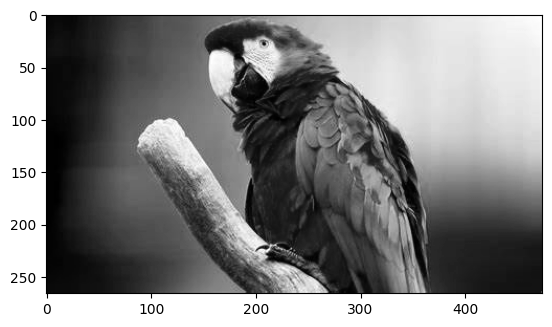

In [13]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gray, cmap='gray');

In [14]:
np.shape(img_gray)

(266, 474)

# Edge Detection

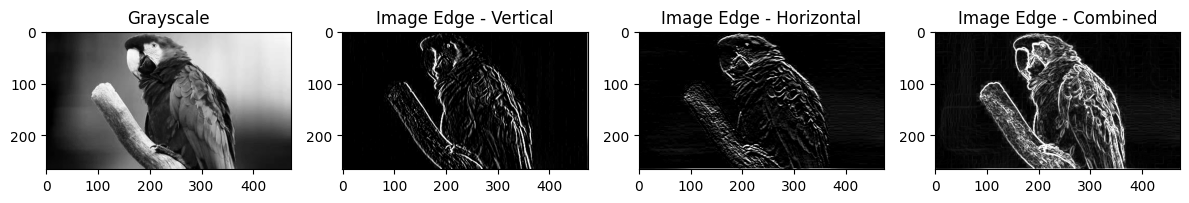

In [15]:
#Sobel kernels
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])

#perform 2d convolution
img_edge_x = sg.convolve(img_gray, sobel_x, mode='same')
img_edge_y = sg.convolve(img_gray, sobel_y, mode='same')

#combine images
img_edge = (img_edge_x**2 + img_edge_y**2)**.5

#correct pixel values
img_edge_x[img_edge_x > 255] = 255
img_edge_x[img_edge_x < 0] = 0

img_edge_y[img_edge_y > 255] = 255
img_edge_y[img_edge_y < 0] = 0

img_edge[img_edge > 255] = 255
img_edge[img_edge < 0] = 0

#return to image format
img_edge_x = img_edge_x.astype(np.uint8)
img_edge_y = img_edge_y.astype(np.uint8)
img_edge = img_edge.astype(np.uint8)

plt.figure(figsize=(12, 4))

# Display the first image in the first subplot
plt.subplot(1, 4, 1)
plt.title("Grayscale")
plt.imshow(img_gray, cmap='gray');

# Display the second image in the second subplot
plt.subplot(1, 4, 2)
plt.title("Image Edge - Vertical")
plt.imshow(img_edge_x, cmap='gray')

# Display the third image in the third subplot
plt.subplot(1, 4, 3)
plt.title("Image Edge - Horizontal")
plt.imshow(img_edge_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title("Image Edge - Combined")
plt.imshow(img_edge, cmap='gray')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Image Sharpening

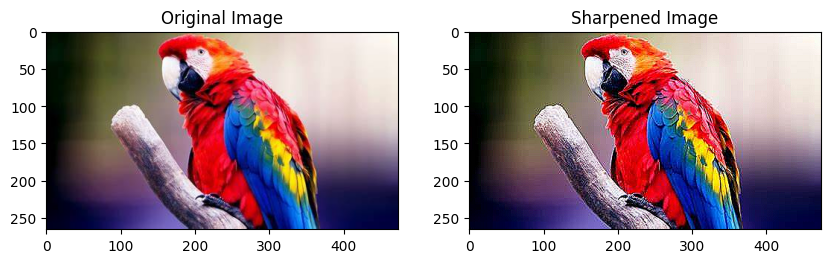

In [16]:
sharpening_filter = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]]) # Laplacian filter

# Apply the filter to each channel
sharpened_image = cv2.filter2D(image, -1, sharpening_filter)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title('Sharpened Image')

plt.show()

# Image Blurring

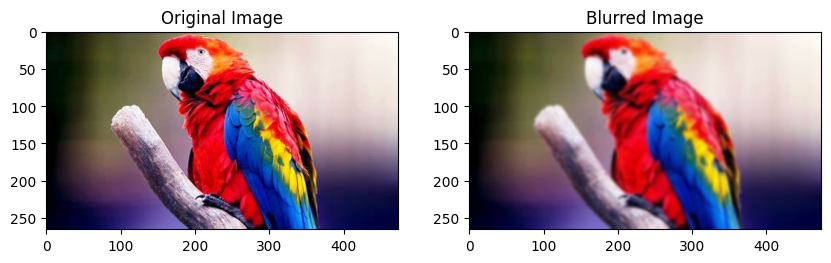

In [18]:
blurring_filter = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]]) # Gaussian filter

# Apply the filter to each channel
blurred_image = cv2.filter2D(image, -1, blurring_filter)
blurred_image = cv2.filter2D(blurred_image, -1, blurring_filter)
blurred_image = cv2.filter2D(blurred_image, -1, blurring_filter)
blurred_image = cv2.filter2D(blurred_image, -1, blurring_filter)
blurred_image = cv2.filter2D(blurred_image, -1, blurring_filter)
blurred_image = cv2.filter2D(blurred_image, -1, blurring_filter)

# Display the original and sharpened images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image)
plt.title('Blurred Image')

plt.show()

# Color Segmentation/Extraction

In [19]:
# Convert BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# plt.imshow(hsv_image, cmap='hsv')

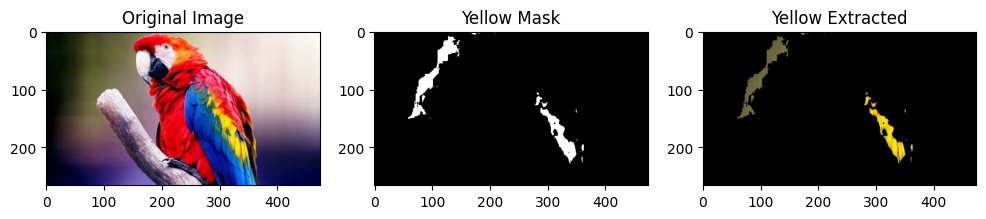

In [20]:
# Define the lower and upper bounds for yellow color in HSV
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

# Create a mask using inRange function
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Bitwise AND to extract the yellow region from the original image
yellow_extracted = cv2.bitwise_and(image, image, mask=yellow_mask)

# Display the original and extracted yellow images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(yellow_mask, cmap='gray')
plt.title('Yellow Mask')

plt.subplot(1, 3, 3)
plt.imshow(yellow_extracted)
plt.title('Yellow Extracted')

plt.show()

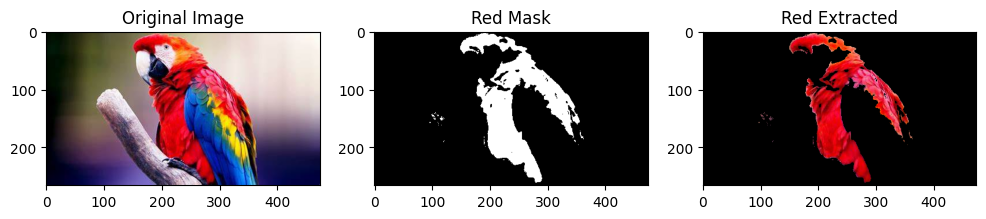

In [21]:
# Define the lower and upper bounds for red color in HSV
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create masks for both ranges and combine them
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Bitwise AND to extract the red region from the original image
red_extracted = cv2.bitwise_and(image, image, mask=red_mask)

# Display the original and extracted red images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(red_mask, cmap='gray')
plt.title('Red Mask')

plt.subplot(1, 3, 3)
plt.imshow(red_extracted)
plt.title('Red Extracted')

plt.show()

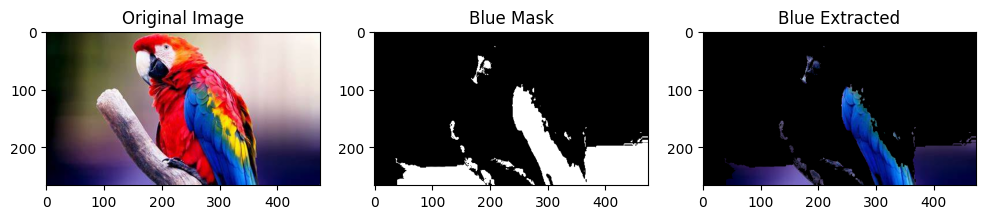

In [22]:
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create a mask using inRange function
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Bitwise AND to extract the blue region from the original image
blue_extracted = cv2.bitwise_and(image, image, mask=blue_mask)

# Display the original and extracted blue images
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(blue_mask, cmap='gray')
plt.title('Blue Mask')

plt.subplot(1, 3, 3)
plt.imshow(blue_extracted)
plt.title('Blue Extracted')

plt.show()